
# Support Vector Regression (SVR) using RBF, linear and polynomial kernels


In [ ]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
# objective function
def objective(x, noise=0):
    y = x * np.sin(x)     
    dy = 0.5 + 1.0 * np.random.normal(0,noise,y.shape)
    y += dy
    return y

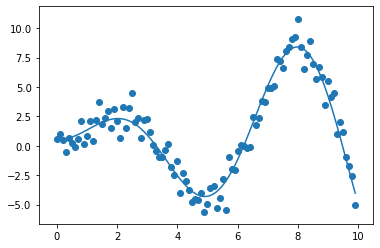

In [20]:
X = np.atleast_2d(np.arange(0,10,0.1)).T
ydenoise = objective(X).ravel() 
y = objective(X,1).ravel() 

# plot the objective function without and with noise 
plt.plot(X, ydenoise)
plt.scatter(X, y)
plt.show()

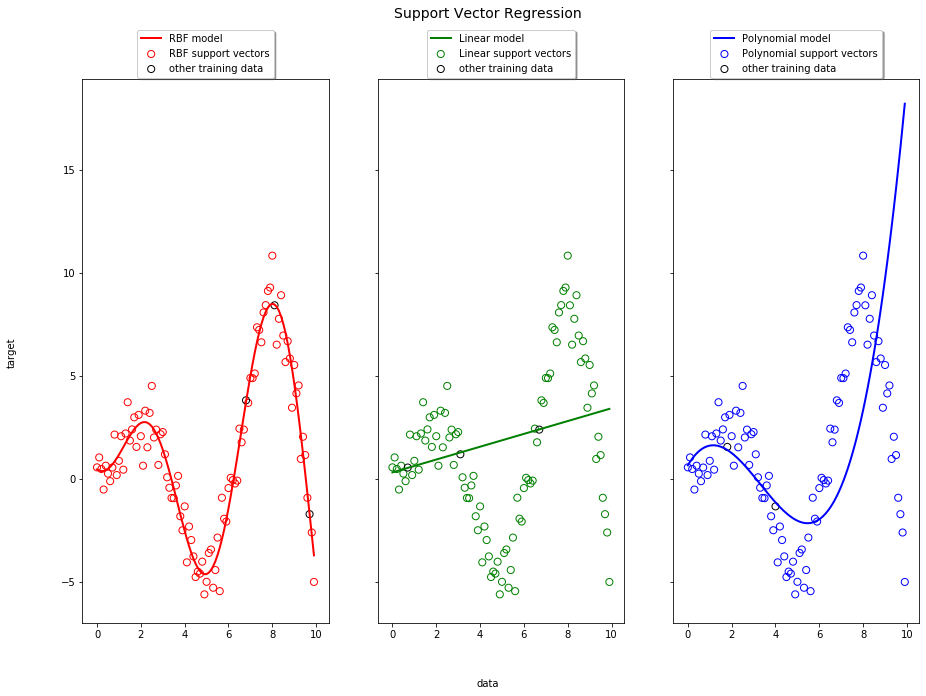

In [21]:
# Define kernels
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1,
               coef0=1)

lw = 2 # define line width

kernels = [svr_rbf, svr_lin, svr_poly]
kernel_label = ['RBF', 'Linear', 'Polynomial']
model_color = ['r', 'g', 'b']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
for ix, kernel in enumerate(kernels):
    axes[ix].plot(X, kernel.fit(X, y).predict(X), color=model_color[ix], lw=lw,
                  label='{} model'.format(kernel_label[ix]))
    axes[ix].scatter(X[kernel.support_], y[kernel.support_], facecolor="none",
                     edgecolor=model_color[ix], s=50,
                     label='{} support vectors'.format(kernel_label[ix]))
    axes[ix].scatter(X[np.setdiff1d(np.arange(len(X)), kernel.support_)],
                     y[np.setdiff1d(np.arange(len(X)), kernel.support_)],
                     facecolor="none", edgecolor="k", s=50,
                     label='other training data')
    axes[ix].legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
                    ncol=1, fancybox=True, shadow=True)

fig.text(0.5, 0.04, 'data', ha='center', va='center')
fig.text(0.06, 0.5, 'target', ha='center', va='center', rotation='vertical')
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()